In [1]:
from model import *
from sortedlist import *
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
sns.set()

//anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


[47, 47, 47, 48, 48, 48, 48, 49, 49, 49, 49, 49, 49, 49, 50, 50, 50, 50, 50, 50]


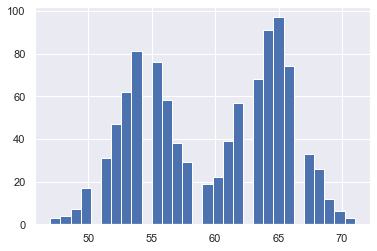

In [2]:
L = 1000
test = SortedList.fromlist(np.abs(np.random.normal(np.sqrt(3*L), 0.0025*L, size=L) + 0.01*L*np.random.randint(2,size=L)).astype(int))
print(test[:20])
plt.hist(test, bins=30)
plt.show()

In [3]:
tests = enumerate(test)
testy, testx = zip(*tests)
testx = np.array(list(testx), dtype=np.float64).reshape(-1,1,1)
testx -= min(testx)
testy = np.array(list(testy), dtype=np.float64).reshape(-1,1,1)
print(testx[:5],testy[:5])
dataset = tf.data.Dataset.from_tensor_slices((testx, testy))
dataset = dataset.shuffle(L)
dataset, len(dataset)

[[[0.]]

 [[0.]]

 [[1.]]

 [[1.]]

 [[1.]]] [[[0.]]

 [[1.]]

 [[2.]]

 [[3.]]

 [[4.]]]


2021-11-06 17:40:50.821084: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(<ShuffleDataset shapes: ((1, 1), (1, 1)), types: (tf.float64, tf.float64)>,
 1000)

In [4]:
from matplotlib.patches import Rectangle
n_epochs=100
model = build_fit_rmi_model(dataset, stages=(1,16,32), n_layers=0, n_neurons=8, n_epochs=n_epochs, verbose=False, optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss='mse', metrics=[MaxAbsoluteError()])
preds, lf = predict_rmi_model(model, testx, with_leaf=True)
lf, lfcounts = np.unique(lf, return_counts=True)
mkrs = [(0,0)]
for li in lfcounts:
    mkrs.append((mkrs[-1][1],mkrs[-1][1] + li - 1))
mkrs = mkrs[1:]
mkhts = [(preds[mi[0]], preds[mi[1]]) for mi in mkrs]
fig, ax = plt.subplots()
seps = np.linspace(0, len(testx), 50)
linax = ax.twinx()
linax.set_ylabel("Placement of Index")
linax.set_ylim(0, len(testx))
gtruth = testx.flatten()
gtruth -= min(gtruth)
gtruth /= max(gtruth)
gtruth *= len(gtruth)
linax.plot(range(len(testx)), testy.flatten(), linestyle='dotted', lw=2)
linax.plot(range(len(testx)), preds, lw=2, c='r')
linax.plot(range(len(testx)), abs(testy.reshape(-1)-preds.reshape(-1)), lw=0.8, c='k')
ax.hist(preds.reshape(-1), bins=seps, alpha=0.4, label='Predicted')
ax.hist(testy.reshape(-1), bins=seps, alpha=0.4, label='Actual')
ax.set_title(f"Prediction Distribution for RMI Model ($E={n_epochs}$)")
ax.set_xlabel("Returned Index")
ax.set_ylabel("Frequency")
# ax.set_ylim(0,5)
# ax.vlines(mkrs, ymin=0, ymax=5, colors='k')
for m in range(len(mkrs)):
    linax.add_patch(Rectangle((mkrs[m][0], mkhts[m][0]), mkrs[m][1]-mkrs[m][0], mkhts[m][1] - mkhts[m][0], facecolor='none', edgecolor='k', linestyle='dotted'))
fig.set_size_inches((12,8))
# A : (S,L,N,eta,eps) = ([1,4,12,16], 1, 8, 15, 1e-4)
plt.savefig("modeling_imgs/BiModalDatasetA.png")
plt.show()

  0%|                                                     | 0/3 [00:00<?, ?it/s]2021-11-06 17:40:51.127123: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
Training Stage 1... Model 1... MaxAE 163.70578002929688:   0%| | 0/3 [00:38<?, ?it/s]

tmp=[[[  5.]
  [107.]]

 [[ 21.]
  [975.]]]
tmp=[[[ 21.]
  [975.]]

 [[  4.]
  [ 61.]]

 [[  8.]
  [345.]]

 [[  4.]
  [ 44.]]

 [[  4.]
  [ 36.]]

 [[ 17.]
  [694.]]

 [[ 19.]
  [853.]]]
tmp=[[[  1.]
  [  4.]]

 [[ 16.]
  [675.]]

 [[ 18.]
  [806.]]

 [[ 18.]
  [794.]]

 [[ 18.]
  [792.]]

 [[ 15.]
  [573.]]

 [[ 16.]
  [683.]]

 [[ 10.]
  [436.]]

 [[  8.]
  [311.]]

 [[ 16.]
  [624.]]

 [[ 10.]
  [446.]]

 [[ 17.]
  [694.]]

 [[  8.]
  [326.]]

 [[ 14.]
  [549.]]

 [[  7.]
  [269.]]

 [[  6.]
  [148.]]

 [[ 15.]
  [600.]]

 [[ 15.]
  [574.]]

 [[  3.]
  [ 16.]]

 [[  6.]
  [135.]]

 [[ 19.]
  [833.]]

 [[ 21.]
  [948.]]

 [[ 18.]
  [772.]]

 [[  6.]
  [180.]]

 [[  6.]
  [163.]]

 [[ 11.]
  [465.]]

 [[ 10.]
  [439.]]

 [[ 13.]
  [500.]]

 [[  8.]
  [322.]]

 [[ 16.]
  [635.]]

 [[ 18.]
  [774.]]

 [[  9.]
  [380.]]

 [[ 25.]
  [998.]]

 [[ 17.]
  [695.]]

 [[  5.]
  [119.]]

 [[ 17.]
  [738.]]

 [[ 19.]
  [873.]]

 [[ 20.]
  [937.]]

 [[  4.]
  [ 60.]]

 [[ 15.]
  [602.]]

 [[ 18.]

Training Stage 1... Model 1... MaxAE 163.70578002929688:  33%|▎| 1/3 [00:41<01:22, 41.12s/it]

tmp=[[[ 15.]
  [610.]]

 [[  7.]
  [250.]]

 [[ 12.]
  [474.]]

 [[ 21.]
  [957.]]

 [[  5.]
  [115.]]

 [[  7.]
  [245.]]

 [[  8.]
  [316.]]

 [[ 20.]
  [917.]]

 [[ 21.]
  [964.]]

 [[  7.]
  [253.]]

 [[  7.]
  [213.]]

 [[  4.]
  [ 41.]]

 [[  8.]
  [281.]]

 [[ 11.]
  [453.]]

 [[ 20.]
  [919.]]

 [[  7.]
  [228.]]

 [[ 19.]
  [864.]]

 [[ 11.]
  [458.]]

 [[ 19.]
  [847.]]

 [[  8.]
  [365.]]

 [[  6.]
  [121.]]

 [[ 18.]
  [818.]]

 [[ 15.]
  [590.]]

 [[ 10.]
  [429.]]

 [[  8.]
  [302.]]

 [[  6.]
  [166.]]

 [[  6.]
  [127.]]

 [[ 16.]
  [660.]]

 [[ 13.]
  [496.]]

 [[ 16.]
  [670.]]

 [[ 16.]
  [640.]]

 [[ 18.]
  [800.]]

 [[  6.]
  [131.]]

 [[ 14.]
  [525.]]

 [[  7.]
  [212.]]

 [[  8.]
  [282.]]

 [[  6.]
  [153.]]

 [[ 14.]
  [541.]]

 [[ 19.]
  [875.]]

 [[ 13.]
  [509.]]

 [[  9.]
  [396.]]

 [[  1.]
  [  4.]]

 [[  4.]
  [ 40.]]]
tmp=[[[  9.]
  [374.]]

 [[ 21.]
  [971.]]

 [[ 19.]
  [833.]]

 [[  5.]
  [ 81.]]

 [[ 12.]
  [468.]]

 [[ 17.]
  [698.]]

 [[  6.]
  [

ValueError: in user code:

    //anaconda3/lib/python3.7/site-packages/keras/engine/training.py:853 train_function  *
        return step_function(self, iterator)
    //anaconda3/lib/python3.7/site-packages/keras/engine/training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    //anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    //anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    //anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    //anaconda3/lib/python3.7/site-packages/keras/engine/training.py:835 run_step  **
        outputs = model.train_step(data)
    //anaconda3/lib/python3.7/site-packages/keras/engine/training.py:787 train_step
        y_pred = self(x, training=True)
    //anaconda3/lib/python3.7/site-packages/keras/engine/base_layer.py:1037 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    //anaconda3/lib/python3.7/site-packages/keras/engine/functional.py:415 call
        inputs, training=training, mask=mask)
    //anaconda3/lib/python3.7/site-packages/keras/engine/functional.py:550 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    //anaconda3/lib/python3.7/site-packages/keras/engine/base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    //anaconda3/lib/python3.7/site-packages/keras/engine/input_spec.py:234 assert_input_compatibility
        str(tuple(shape)))

    ValueError: Input 0 of layer dense_1 is incompatible with the layer: : expected min_ndim=2, found ndim=0. Full shape received: ()


Training Stage 0... Model 0:   0%|                        | 0/3 [00:00<?, ?it/s]

pred = [2 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 1 0 1 0 1 1 2 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0
 0 1 0 0 0 1 0 0 0 2 0 0 0 1 1 1 2 0 1 0 0 0 0 0 0 3 0 0 0 1 0 0 1 0 0 0 0
 1 1 1 0 0 0 2 0 1 0 0 1 1 0 1 1 1 2 0 1 1 0 2 1 0 1 1 0 1 0 0 1 0 0 0 2 2
 0 0 1 1 0 1 1 0 0 0 2 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0
 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 2 2
 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 2 2 1
 0 1 2 1 0 0 1 0 0 0 2 0 2 1 0 0 0 0 1 0 0 0 1 2 1 0 0 0 1 1 1 1 0 0 0 0 2
 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 2 1 0 1 1 1 1 1 1 0 1 0 1 0 0
 0 1 1 0 2 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 1 2
 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 2 1 0 0 1 1 1 0 0
 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 2 1 0 0 0 0 0 1 1
 1 1 0 1 0 0 1 1 0 0 0 0 2 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0
 1 0 1 0 1 1 1 1 1

Training Stage 1... Model 0:  33%|█████▎          | 1/3 [00:01<00:03,  1.55s/it]

pred = [4 2 3 2 2 0 1 2 0 0 3 1 4 2 2 0 2 0 3 1 0 2 1 2 3 1 2 1 3 3 0 2 3 1 0 0 0
 0 0 1 0 2 3 2 3 3 2 0 0 0 0 5 0 2 2 2 0 0 0 1 1 3 1 0 0 0 0 1 1 0 0 0 2 4
 0 3 0 1 2 0 1 4 3 2 1 1 0 1 0 0 0 0 4 1 0 1 0 2 0 5 0 3 0 3 1 3 1 1 0 1 3
 1 2 3 1 0 2 1 3 3 1 0 1 2 2 2 4 2 0 1 2 0 2 0 0 0 0 0 0 3 0 2 2 0 2 2 0 0
 0 3 2 1 2 2 2 3 0 1 3 2 1 2 3 3 1 1 0 2 0 1 0 2 0 0 0 0 0 1 2 0 1 0 0 3 3
 1 2 1 0 0 3 0 1 0 0 2 2 0 1 0 0 3 1 1 2 2 1 2 0 0 1 1 2 1 0 0 2 0 3 0 1 1
 0 2 1 2 2 0 2 0 2 0 2 1 1 0 1 2 2 3 4 0 0 0 1 0 1 3 2 3 0 5 2 2 3 0 0 0 0
 0 2 0 1 0 0 0 1 1 1 0 0 2 2 1 0 0 0 0 0 2 3 0 0 1 0 1 3 0 1 2 2 5 3 0 1 0
 0 1 0 0 2 1 2 0 2 2 5 2 0 0 2 3 1 3 0 1 0 1 2 2 1 1 0 1 1 4 2 2 1 0 2 1 2
 0 3 0 1 0 0 1 1 1 2 0 2 0 1 0 2 2 1 1 4 1 0 4 1 0 2 1 0 1 1 0 1 2 2 0 2 1
 0 1 1 3 0 1 2 0 0 0 2 4 0 3 3 0 0 0 0 0 0 0 1 3 2 0 0 1 0 1 0 1 0 1 0 1 3
 1 4 1 1 0 1 0 3 2 0 0 1 2 0 0 0 0 2 2 2 0 1 1 1 1 0 2 1 1 0 0 1 2 1 0 2 2
 2 2 1 1 0 0 1 1 0 2 1 0 2 0 0 0 0 1 1 3 2 0 0 0 3 1 1 2 0 2 0 1 1 1 1 0 2
 1 2 0 2 1 1 0 0 4

Training Stage 1... Model 1:  33%|█████▎          | 1/3 [00:02<00:03,  1.55s/it]

pred = [0 1 2 2 1 1 1 2 3 1 0 0 1 0 2 1 2 0 1 3 1 1 1 0 2 2 0 3 3 2 1 2 3 1 3 0 2
 2 0 1 0 0 2 1 0 2 1 1 4 0 2 0 1 0 0 0 1 2 0 2 2 1 0 1 0 1 0 1 0 2 0 3 2 2
 0 2 1 1 2 1 1 2 3 1 0 2 1 1 0 1 0 1 0 0 2 0 1 1 0 1 0 0 0 2 2 0 1 0 0 1 2
 2 1 1 0 1 0 1 0 2 0 3 1 2 3 2 1 2 0 0 2 0 1 1 0 2 0 2 2 1 0 3 0 0 2 1 2 2
 1 0 3 0 1 0 2 0 2 2 0 0 2 2 1 1 0 0 0 2 2 1 1 1 2 0 1 2 0 3 2 1 3 0 1 2 0
 1 0 0 2 0 2 1 1 2 1 4 1 2 0 2 2 0 0 0 0 2 1 0 1 1 0 0 0 0 2 0 2 0 1 0 1 0
 0 4 0 0 3 2 1 0 0 3 1 1 0 0 0 0 2 0 0 2 0 0 0 1 0 0 4 1 2 2 3 2 0 0 2 1 1
 2 0 0 2 1 0 2 0 0 1 2 2 2 0 1 2 2 2 2 0 0 1 1 1 1 2 1 0 3 1 0 1 2 0 3 3 2
 0 1 3 2 1 0 0 0 2 1 2 1 2 2 2 0 0 1 0 0 0 0 1 1 1 0 2 1 0 1 1 3 0 1 2 1 1
 0 2 3 1 0 2 3 1 1 0 1 0 0 0 0 0 0 0 2 1 2 2 3 0]


Training Stage 2... Model 0:  67%|██████████▋     | 2/3 [00:03<00:01,  1.74s/it]

pred = [0 0 1 2 0 0 0 1 2 0 2 1 3 1 1 2 0 0 0 1 1 0 2 2 1 2 0 0 0 1 0 0 2 2 2 0 0
 0 1 2 1 0 0 1 1 1 1 1 0 2 1 0 0 1 0 1 2]


Training Stage 0... Model 0:   0%|                        | 0/3 [00:00<?, ?it/s]

1... pred = [2 2 0 1 1 0 3 2 2 1 0 3 0 1 0 3 1 0 0 3 0 0 0 1 1 1 1 0 1 1 1 2 2 2 0 1 0
 1 2 0 0 1 1 0 1 1 0 3 0 0 0 0 1 1 0 2 0 2 1 2 4 0 1 0 0 0 1 0 3 2 2 0 1 1
 0 1 0 1 1 0 2 3 0 3 2 3 1 1 2 1 0 1 1 1 2 1 1 1 0 2 0 2 1 2 2 0 0 1 2 0 2
 1 2 0 2 2 2 0 1 1 1 0 0 2 0 2 2 3 0 1 1 0 0 1 4 1 3 2 2 2 2 0 2 2 1 0 1 1
 0 2 3 0 1 0 2 3 0 0 1 1 1 1 2 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 2 2 0
 1 0 0 1 0 1 3 1 0 0 0 0 1 2 0 0 1 0 2 3 2 2 1 2 0 2 1 2 0 0 0 0 0 2 1 2 0
 0 0 0 0 0 2 1 0 0 2 1 1 1 0 2 2 1 1 1 1 0 0 1 2 0 0 0 0 2 1 0 0 0 0 0 0 0
 2 2 1 0 1 2 0 0 2 0 0 0 1 0 0 0 1 0 0 0 0 1 3 0 1 0 0 0 0 1 2 0 2 1 0 2 1
 2 1 0 1 1 0 1 0 0 1 2 0 2 0 0 0 0 0 0 1 0 1 0 1 0 0 2 0 0 0 0 0 0 0 2 1 1
 1 0 1 1 0 0 0 0 1 2 2 1 0 1 1 0 0 0 0 0 2 2 2 1 2 2 0 1 0 0 0 2 0 0 1 1 2
 1 3 3 0 1 1 1 2 2 2 1 1 1 1 2 2 2 2 0 1 1 1 1 1 1 0 1 3 0 1 1 2 2 3 0 1 0
 2 2 1 0 0 0 1 0 2 1 0 2 1 1 0 2 2 1 1 0 0 1 1 0 0 2 2 1 2 1 0 2 2 0 0 2 1
 3 4 1 1 1 1 0 2 2 0 2 0 2 2 1 0 0 1 0 0 0 2 1 0 0 2 3 2 0 0 1 0 0 2 0 2 2
 1 1 4 0 3 0 

Training Stage 1... Model 0:  33%|█████▎          | 1/3 [00:02<00:04,  2.06s/it]

pred = [3 2 1 0 2 0 5 0 1 3 0 1 3 3 0 2 0 1 1 2 4 1 2 4 0 3 0 0 2 2 0 3 2 1 0 4 5
 1 0 3 4 0 1 2 1 1 3 2 2 1 1 0 1 4 0 0 2 1 0 3 1 3 0 5 0 2 3 0 1 0 2 0 1 0
 3 2 2 3 1 2 3 0 0 1 4 2 0 0 3 0 4 3 4 0 1 3 0 3 3 1 3 2 0 1 1 0 1 2 0 0 2
 0 3 0 0 4 3 3 4 1 2 2 0 0 0 0 0 3 0 0 3 2 1 3 3 0 0 1 2 2 0 2 1 2 2 2 1 3
 0 2 0 4 0 4 2 1 4 0 0 2 0 2 0 1 0 0 0 1 0 2 3 4 0 1 2 0 2 0 2 0 2 3 0 1 1
 4 0 0 0 1 2 1 0 0 2 0 2 0 5 2 1 2 3 3 1 2 2 0 0 1 6 0 0 1 0 3 1 0 0 0 1 1
 1 2 3 0 1 1 1 0 0 0 2 2 0 0 4 0 2 2 3 1 0 3 0 0 4 2 0 0 1 0 0 2 1 3 0 4 0
 0 1 2 3 1 3 2 0 1 1 0 2 2 2 2 2 2 2 2 4 0 0 1 2 2 1 5 0 3 2 0 0 2 2 1 1 2
 3 2 0 1 2 1 0 2 3 2 2 0 3 1 2 3 0 2 0 2 0 2 0 1 2 0 3 0 4 1 1 0 3 0 1 1 0
 1 0 3 2 3 1 1 0 1 0 1 2 2 0 0 2 2 0 2 1 2 0 1 2 0 1 0 3 2 0 1 4 2 0 0 0 0
 3 3 3 1 3 4 3 1 0 2 2 0 0 2 3 1 0 2 2 1 1 0 2 1 2 1 2 2 0 2 0 0 2 1 1 0 2
 4 1 5 0 3 0 0 0 2 1 2 0 3 2 2 0 2 3 2 1 3 1 2 0]


Training Stage 1... Model 2:  33%|█████▎          | 1/3 [00:04<00:04,  2.06s/it]

pred = [1 2 2 4 2 6 0 2 0 1 3 1 2 0 0 4 1 0 0 1 2 3 3 2 0 3 0 0 4 2 1 1 0 3 2 1 3
 2 0 0 0 1 1 1 0 2 2 3 4 0 4 1 1 2 4 0 3 5 1 2 1 3 1 0 1 4 3 3 1 0 2 3 0 2
 2 1 0 1 2 2 0 1 1 2 1 1 0 0 3 0 2 0 3 1 1 3 0 0 3 2 1 2 1 2 3 0 1 1 0 0 0
 0 1 0 2 2 1 0 0 3 2 1 4 1 0 1 2 3 0 0 0 0 2 2 3 1 2 1 0 0 1 2 2 0 0 1 1 2
 0 1 1 1 3 2 0 2 0 4 2 1 1 0 4 0 0 0 1 2 0 2 1 1 4 0 1 3 0 0 0 2 0 1 0 2 2
 3 2 2 3 2 2 0 0 5 0 2 1 1 1 2 0 0 1 2 1 1 3 0 2 0 3 0 0 1 0 1 3 2 0 0 2 1
 2 1 1 0 0 2 0 2 2 1 1 0 0 4 4 0 3 0 0 0 3 1 0 1 0 2 2 0 1 0 0 0 1 3 0 0 3
 5 0 2 3 0 0 0 3 3 2 3 0 3 0 0 2 3 2 1 1 2 0 2 2 0 2 2 1 3 1 0 2 0 3 0 1 0
 3 0 2 2 0 5 0 1 3 3 1 0]


Training Stage 2... Model 0:  67%|██████████▋     | 2/3 [00:04<00:02,  2.26s/it]

pred = [0 2 2 0 2 1 0 2 3 0 1 3 3 0 0 0 3 1 2 1 0 2 1 2 4 3 0 3 2 2 1 2 2 2 2 0 0
 2 4 1 2 1 1 4 0 0 1 1 0 0 2 1 0 2 1 2 2 2 0 0 1 0 1 3 0 0 0 0 0 3 2 0 2 3
 0 2 3 2 4 2 0 1 4 4 2 3 4 3 5 0 2 1 1 1 1 4 1 3 0 0 2 3 4 2 0 3 0 2 2 0 0
 1 2 0 3 0 0 2 2 0 2 0 0 0 1 2 2 5 0 2 0 2 1 3 1 0 0 1 0 0 0 1 2 3 1 2 1 1
 0 1 0 0 0 1 1 0 3 3 1 0 0 1 1 2 2 1 4 0 0 0 1 2 1 1 2 1 0 3 3 0 4 0 0 1 1
 3 3 1 1 1 2 0 2 1 3 0 2 0 2 1 3 2 3 0 1 1 1 0 1 2 1 1 0 2 2 0 3 3 2 1 1 0
 4 0 0 0 1 2 2 1 1 2 0 0 1 2 2 5 0 3 3 1 2 3 1 3 4 1 2 0 3 2 4 1 2 3 1 1 1
 0 2]


Training Stage 2... Model 3: 100%|████████████████| 3/3 [00:05<00:00,  1.94s/it]


KeyboardInterrupt: 

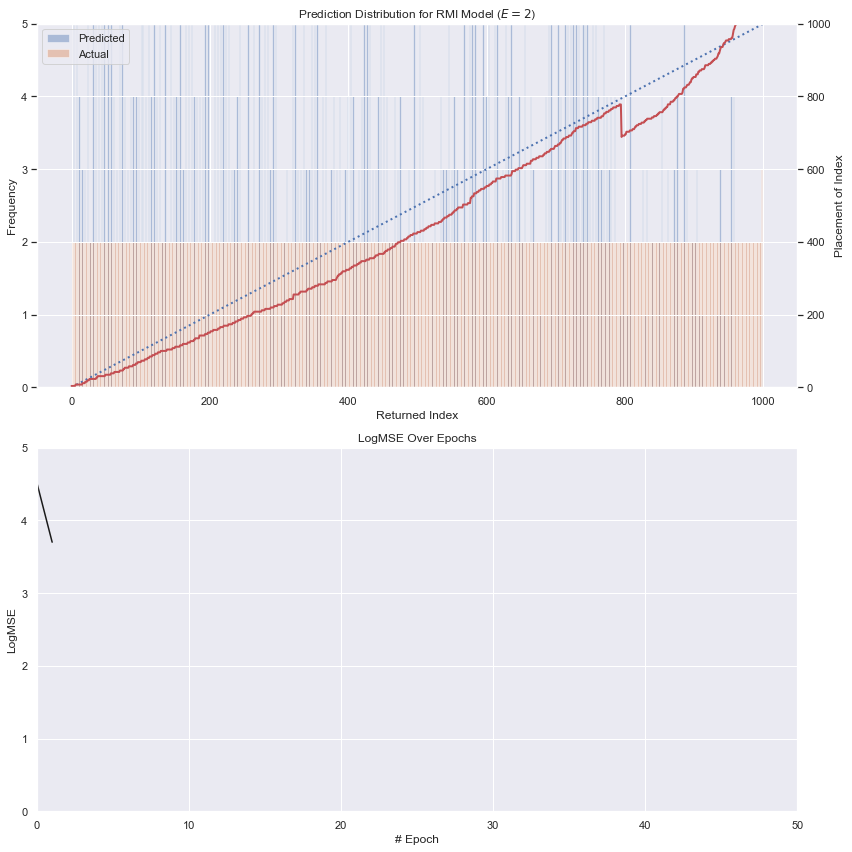

In [5]:
cumloss = []
max_epoch = 50
for n_epochs in range(1,max_epoch+1):
    model = build_fit_rmi_model(dataset, n_neurons=128, n_epochs=n_epochs, optimizer=keras.optimizers.Adam(learning_rate=5e-4), loss='mse', verbose=0)

    preds = predict_rmi_model(model, testx)
    mse = keras.metrics.MeanSquaredError()
    mse.update_state(preds, testy.reshape(-1,1))
    cumloss.append(mse.result().numpy())
    
    c = np.c_[preds, testy.reshape(-1,1)]

    fig, (ax, lax) = plt.subplots(2,1)
    seps = np.arange(0, len(testx), 2)
    linax = ax.twinx()
    linax.set_ylabel("Placement of Index")
    linax.set_ylim(0, len(testx))
    linax.plot(range(len(testx)), range(len(testx)), linestyle='dotted', lw=2)
    linax.plot(range(len(testx)), preds, lw=2, c='r')
    ax.hist(preds.reshape(-1), bins=seps, alpha=0.4, label='Predicted')
    ax.hist(testy.reshape(-1), bins=seps, alpha=0.4, label='Actual')
    ax.set_title(f"Prediction Distribution for RMI Model ($E={n_epochs}$)")
    ax.set_xlabel("Returned Index")
    ax.set_ylabel("Frequency")
    ax.set_ylim(0,5)
    ax.legend(loc='upper left')
    lax.plot(range(len(cumloss)), np.log10(cumloss), c='k')
    lax.set_title("LogMSE Over Epochs")
    lax.set_xlabel("# Epoch")
    lax.set_ylabel("LogMSE")
    lax.set_xlim(0,max_epoch)
    lax.set_ylim(0,5)
    fig.set_size_inches((12,12))
    # plt.show()
    plt.tight_layout()
    plt.savefig(f"modeling_imgs/n_epochs_{n_epochs}.png")
    plt.close()
    print(f"{n_epochs}...", end=' ')

In [ ]:
exm = new_stage_model(n_neurons=8, n_layers=1)
# exm.add_metric(keras.metrics.Sum(name='sum1')(exm.outputs), name='sum')
exm.compile(loss='mse', optimizer='adam', 
            metrics=[MaxAbsoluteError()])
exhist = exm.fit(dataset, epochs=100)
mape = exhist.history['max_absolute_error']
los = exhist.history['loss']
fig, (mapeax, lax, hax) = plt.subplots(3,1)
mapeax.plot(range(len(mape)), mape)
mapeax.set_title("MaxAE in training")
mapeax.set_xlabel("Epoch #")
mapeax.set_xticks(range(0,len(mape),5))
mapeax.set_ylabel("MaxAE")
lax.plot(range(len(mape)), los)
lax.set_title("MSE Loss in training")
lax.set_xlabel("Epoch #")
lax.set_xticks(range(0,len(mape),5))
lax.set_ylabel("MSE Loss")
lax.set_yscale('log')
preds = exm.predict(testx) + 1
seps = np.arange(0,L,max(1,L//25))
hax.hist(preds.reshape(-1), bins=seps, alpha=0.4, label='Predicted')
hax.hist(testy.reshape(-1), bins=seps, alpha=0.4, label='Actual')
hax.set_title("Key Distribution")
hax.set_xlim(0,L)
hax.set_ylim(0,L//2)
hax.set_xlabel("Key index")
hax.set_ylabel("Frequency")
hax.legend()
fig.set_size_inches((12,12))
plt.tight_layout()
plt.show()

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.config.list_physical_devices()